In [1]:
import numpy as np

# X 값 생성
X = np.linspace(0, 100, 200)  # 0부터 6까지 범위에서 100개의 점 생성

# Y 값 계산 (노이즈 추가)
Y_true = -(X - 50) ** 2 + 1500  # 노이즈를 더하기 전의 Y 값

# 노이즈 추가
noise = np.random.normal(0, 300, 200)  # 평균이 0이고 표준 편차가 1인 정규 분포에서 랜덤한 값 생성
Y = Y_true + noise


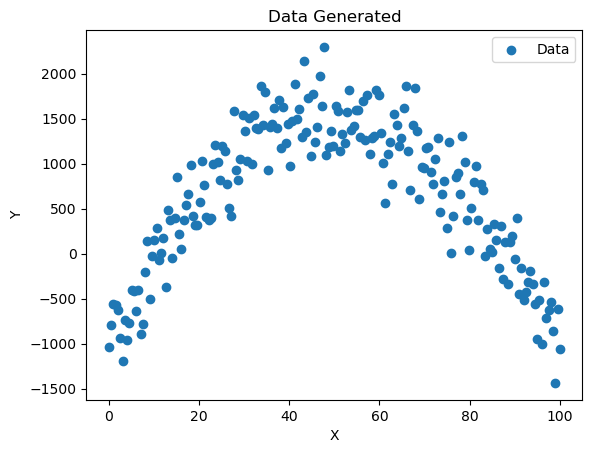

In [2]:
import matplotlib.pyplot as plt

# 데이터 시각화
plt.scatter(X, Y, label='Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Generated')
plt.legend()
plt.show()


데이터의 평균: 662.7547851057441


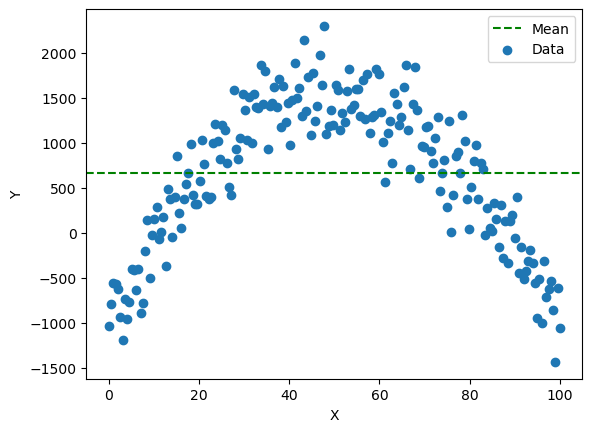

In [3]:
# 평균 계산
mean_Y = np.mean(Y)
print("데이터의 평균:", mean_Y)

# 평균 선 추가
plt.axhline(mean_Y, color='green', linestyle='--', label='Mean')
plt.scatter(X, Y, label='Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# 시각화
plt.show()

데이터의 특성을 표현하기에 너무 부적합함

## 지수가중이동평균
모든 데이터를 하나하나 추적하면 데이터의 과적합을 불러 일으킬 수 있으므로, 데이터의 일부분의 평균을 구해 그것을 데이터로 사용한다.

이 때 오래된 데이터에 가중치를 더 많이 부여해 그 영향을 줄인다.
$$
\hat{V}_{t-1} = \beta \times \hat{V}_{t-2} + (1-\beta) \times \Theta_{t-1}
$$$$$$​1ta \right)\ \times \Theta _{t-1}$ {V}t−1​ = β×Vt−2​ + (1−β) ×Θt−1​​

In [19]:
b = 0.9

data = {}
Y_data = []
for i in range(len(X)):
    data[X[i]] = Y[i]

for i in range(1,len(X)-1):
    Y_data.append((1-b) * Y[i-1] + b * Y[i])    

Ex=[]
num = round(1/(1-b))

for i in range(num-1, len(Y_data)-1):
    sum_Y = 0
    for j in range(i-num+1, i+1):
        sum_Y += Y_data[j]
    Ex.append(sum_Y / num)

print(len(Ex))

188


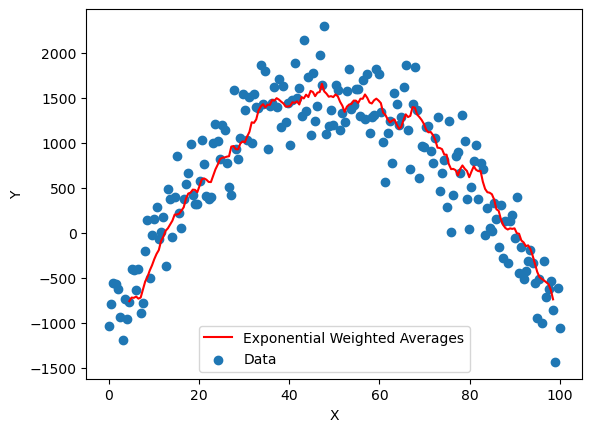

In [20]:
# Ex를 꺾은선 그래프로 시각화
plt.plot(X[num-1:-3], Ex, color='red', linestyle='-', label='Exponential Weighted Averages')


# 데이터 포인트 시각화
plt.scatter(X, Y, label='Data')

# 축 및 범례 설정
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# 그래프 출력
plt.show()
